In [1]:
# Credit: some of the snippets containing the plotting for the code below were taken from kaggle

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from pprint import pprint
from sklearn.model_selection import StratifiedKFold

In [4]:
df = pd.read_csv("heart.csv")
df.head(2)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


### About this dataset - Info from Kaggle
*  **Age** : Age of the patient

*  **Sex**: Sex of the patient

*  **exang**: exercise induced angina (1 = yes; 0 = no)

*  **ca**: number of major vessels (0-3)

*  **cp** : Chest Pain type chest pain type
    * Value 1: typical angina
    * Value 2: atypical angina
    * Value 3: non-anginal pain
    * Value 4: asymptomatic
*  **trtbps** : resting blood pressure (in mm Hg)

*  **chol** : cholestoral in mg/dl fetched via BMI sensor

*  **fbs** : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

*  **rest_ecg** : resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    * thalach : maximum heart rate achieved

*  **output** : 0= less chance of heart attack 1= more chance of heart attack

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isnull().any()

age         False
sex         False
cp          False
trtbps      False
chol        False
fbs         False
restecg     False
thalachh    False
exng        False
oldpeak     False
slp         False
caa         False
thall       False
output      False
dtype: bool

1    165
0    138
Name: output, dtype: int64


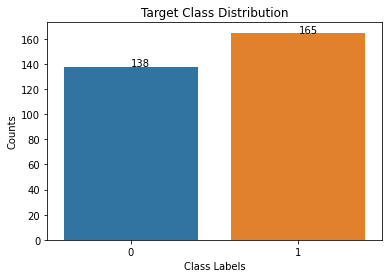

In [7]:
# plot clas distribution
sns.countplot(df['output'])
print(df['output'].value_counts())
for index, value in enumerate([df['output'].value_counts()[0], df['output'].value_counts()[1]]):
    plt.text(index, value,  str(value))

plt.xlabel("Class Labels")
plt.ylabel("Counts")
plt.title("Target Class Distribution")
plt.show()

In [8]:
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

### Relation ship between attribute and target column

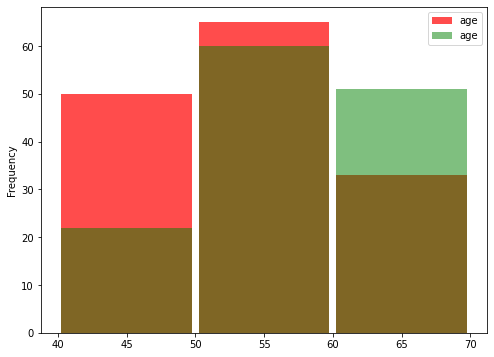

The plot shows that people between the age 50-60 bear highest risk to get a heary attack followed by ages range 40-45


In [9]:
# plot to see people under what age bear high heart attack risk
df[df['output']==1]['age'].plot(kind='hist',figsize=(8,6),rwidth=0.95,histtype='bar',stacked=True,color
='r',alpha=0.70,bins=[40,50,60,70], legend = True)
df[df['output']==0]['age'].plot(kind='hist',figsize=(8,6),rwidth=0.95,histtype='bar',stacked=True,color
='g',alpha=0.5,bins=[40,50,60,70], legend = True)
plt.show()
print("The plot shows that people between the age 50-60 bear highest risk to get a heary attack followed by ages range 40-45")

### Sex vs risk of heart attack

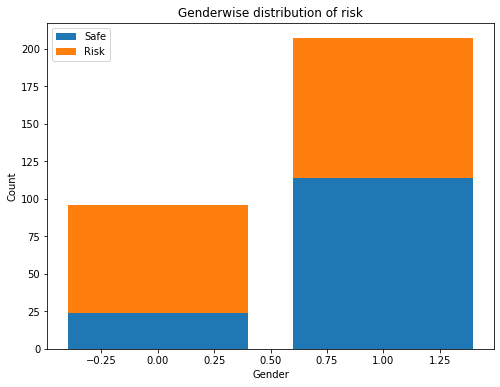

In [14]:
# plot sex vs. higher risk of heart attack
y0 = df[df['output']==0].groupby('sex')['output'].count()
y1 = df[df['output']==1].groupby('sex')['output'].count()
fig = plt.subplots(figsize =(8, 6))
p1 = plt.bar(np.arange(0,2),y0,label='Safe')
p2 = plt.bar(np.arange(0,2),y1,bottom=y0,label='Risk')
plt.ylabel('Count')
plt.title('Genderwise distribution of risk')
plt.xlabel('Gender')
plt.legend()
plt.show()

### Exang vs hear attak risk

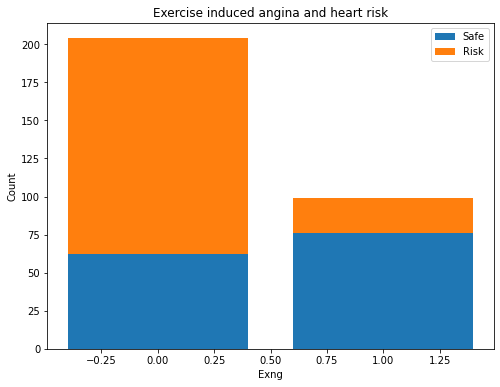

people who do not have exercise induced angina have higher heart attack risk


In [15]:
# plot exng vs heart attack risk
y0 = df[df['output']==0].groupby('exng')['output'].count()
y1 = df[df['output']==1].groupby('exng')['output'].count()

fig = plt.subplots(figsize =(8, 6))
p1 = plt.bar(np.arange(0,2),y0,label='Safe')
p2 = plt.bar(np.arange(0,2),y1,bottom=y0,label='Risk')
plt.ylabel('Count')
plt.title('Exercise induced angina and heart risk')
plt.xlabel('Exng')
plt.legend()
plt.show()
print("people who do not have exercise induced angina have higher heart attack risk")

### number of vasals vs heart attack risk

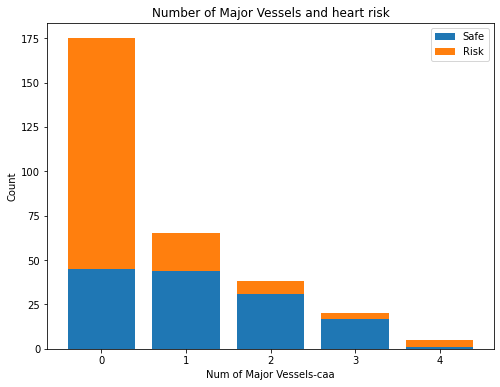

We cans see that as the number of major vessals increase the risk of heart attack decreases.


In [16]:
# plot number of vasals vs heart attack risk
y0 = df[df['output']==0].groupby('caa')['output'].count()
y1 = df[df['output']==1].groupby('caa')['output'].count()
fig = plt.subplots(figsize =(8, 6))
p1 = plt.bar(np.arange(0,5),y0,label='Safe')
p2 = plt.bar(np.arange(0,5),y1,bottom=y0,label='Risk')
plt.ylabel('Count')
plt.title('Number of Major Vessels and heart risk')
plt.xlabel('Num of Major Vessels-caa')
plt.legend()
plt.show()
print("We cans see that as the number of major vessals increase the risk of heart attack decreases.")

In [17]:
# seperate data from the label output column
x = df.drop('output', axis=1)
y = df['output']

### Split the data to training and testing set

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.20)

### Pre-process

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### GaussianNB

In [20]:
%%time
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train,Y_train)
Y_pred_NB = nb_classifier.predict(X_test)
nb_score = accuracy_score(Y_test,Y_pred_NB)
nb_score

Wall time: 8.01 ms


0.7704918032786885

### Random Forest

In [21]:
%%time
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=50)
rf_classifier.fit(X_train,Y_train)
Y_Pred_RF = rf_classifier.predict(X_test)
rf_score = accuracy_score(Y_test,Y_Pred_RF)
rf_score

Wall time: 204 ms


0.7704918032786885

### Linear SVC

In [22]:
%%time
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train, Y_train)
svc_pred = svc.predict(X_test)
svc_score = accuracy_score(Y_test,svc_pred)
svc_score

Wall time: 6.66 ms


0.7540983606557377

### Performance accuracies

In [23]:
score_df = pd.DataFrame({'Model':['Gaussian Naive Bayes','Random Forest', "SVC"],'AccuracyScore':[nb_score*100,rf_score*100, svc_score*100]})
score_df

,Model,AccuracyScore
0,Gaussian Naive Bayes,77.049180
1,Random Forest,77.049180
2,SVC,75.409836


### Plot base learner accuracies

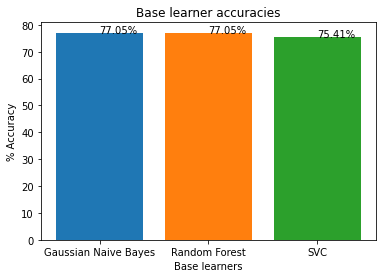

In [24]:
# Plot the accuracies of chosen base learners
info = score_df.to_dict()
for val in range(len(info["Model"])):
    plt.bar(info["Model"][val], info["AccuracyScore"][val])

for index, value in enumerate(info["AccuracyScore"].items()):
    plt.text(index, value[1],  str(round(value[1],2)) + "%")

plt.xlabel("Base learners")
plt.ylabel("% Accuracy")
plt.title("Base learner accuracies")
plt.show()

### Plot ROC Curve

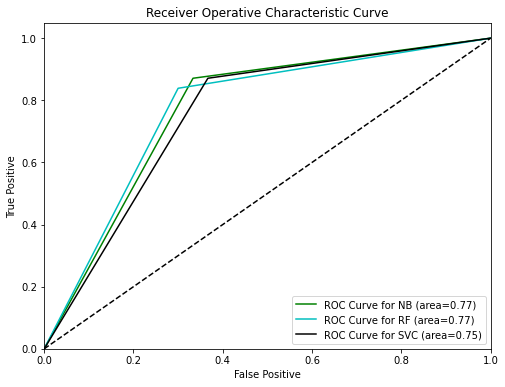

In [25]:
# plot ROC curve for the chosen base learners
from sklearn import metrics
plt.figure(figsize=(8,6))

def plot_roc(actual, pred, lbl, clr):
    fpr, tpr, threhsholds = metrics.roc_curve(actual, pred)
    auc_score = metrics.roc_auc_score(actual,pred)
    plt.plot(fpr,tpr,color=clr,label='ROC Curve for '+ lbl +' (area=%.2f)'% auc_score)
    
plot_roc(Y_test,Y_pred_NB,lbl='NB',clr='g')
plot_roc(Y_test,Y_Pred_RF,lbl='RF',clr='c')
plot_roc(Y_test,svc_pred,lbl='SVC',clr='black')

plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('Receiver Operative Characteristic Curve')
plt.legend()
plt.show()

In [26]:
# import required libraries for grid serach and ensemble techniques
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC

# AdaBoostClassifier GridSearch

In [27]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
param_grid = {
 'n_estimators': [15, 25, 35, 50],
 'learning_rate': [0.75, 1.0],
}
base_estimator_lib= {"LinearSVC":SVC(kernel='linear', probability=True), "GaussianNB":GaussianNB(), "RandomForest":RandomForestClassifier()}

In [28]:
%%time
result = {}
for be in base_estimator_lib.keys():
    grid_search=GridSearchCV(
        AdaBoostClassifier(base_estimator_lib[be]), 
        param_grid=param_grid, 
        cv=10)
    grid_search.fit(x,y)
    result[be] = {"best_score":grid_search.best_score_, "best_param":grid_search.best_estimator_}
pprint(result)

{'GaussianNB': {'best_param': AdaBoostClassifier(base_estimator=GaussianNB(), n_estimators=35),
                'best_score': 0.6404301075268817},
 'LinearSVC': {'best_param': AdaBoostClassifier(base_estimator=SVC(kernel='linear', probability=True),
                   n_estimators=15),
               'best_score': 0.75247311827957},
 'RandomForest': {'best_param': AdaBoostClassifier(base_estimator=RandomForestClassifier(), learning_rate=0.75,
                   n_estimators=15),
                  'best_score': 0.8412903225806451}}
Wall time: 1min 14s


# Stacking Classifier

In [29]:
from sklearn.ensemble import StackingClassifier
param_grid = {
 'estimators': [("rf", RandomForestClassifier()), ("GNB", GaussianNB()), ("svc", SVC(kernel='linear', probability=True))],
 'cv': [5],
 'stack_method': ["auto", "predict_proba"]
}
base_estimator_lib= {"LinearSVC":SVC(kernel='linear', probability=True), "GaussianNB":GaussianNB(), "RandomForest":RandomForestClassifier()}

In [30]:
%%time
result = {}
for be in base_estimator_lib.keys():
    clf = StackingClassifier(estimators=param_grid["estimators"], final_estimator=base_estimator_lib[be], cv = 10, stack_method= "auto")
    acc = clf.fit(X_train, Y_train).score(X_test, Y_test)
    result[be] = acc
pprint(result)

{'GaussianNB': 0.8032786885245902,
 'LinearSVC': 0.8032786885245902,
 'RandomForest': 0.7540983606557377}
Wall time: 4.71 s



# Bagging Classifier GridSearch

In [32]:
from sklearn.ensemble import BaggingClassifier
param_grid = {
 'bootstrap': [True, False],
 'n_estimators': [15, 25,35, 50],
 'max_samples' : [0.8, 1.0]
}

base_estimator_lib= {"LinearSVC":SVC(kernel='linear', probability=True), "GaussianNB":GaussianNB(), "RandomForest":RandomForestClassifier()}

In [23]:
%%time  # this section of the code takes approximately 55+ minutes to completely run
result = {}

for be in base_estimator_lib.keys():
    grid_search=GridSearchCV(
        BaggingClassifier(base_estimator_lib[be]), 
        param_grid=param_grid, 
        cv=10)
    
    grid_search.fit(x,y)
    result[be] = {"best_score":grid_search.best_score_, "best_param":grid_search.best_estimator_}
pprint(result)

{'GaussianNB': {'best_param': BaggingClassifier(base_estimator=GaussianNB(), max_samples=0.8, n_estimators=15),
                'best_score': 0.8117486338797815},
 'LinearSVC': {'best_param': BaggingClassifier(base_estimator=SVC(kernel='linear', probability=True),
                  max_samples=0.8, n_estimators=25),
               'best_score': 0.8413661202185793},
 'RandomForest': {'best_param': BaggingClassifier(base_estimator=RandomForestClassifier(), max_samples=0.8,
                  n_estimators=15),
                  'best_score': 0.834808743169399}}
Wall time: 53min 59s


### Time calculations for ensemble technies using best hyper parameters

### Boosting Classifier

In [43]:
%%time 
adb = AdaBoostClassifier(base_estimator = RandomForestClassifier(), n_estimators = 50, learning_rate = 1.0)
acc = adb.fit(X_train, Y_train).score(X_test,Y_test)
print("Accuracy of Boosting classifier:", acc)

Accuracy of Boosting classifier: 0.7868852459016393
Wall time: 183 ms


### Staking Classifier

In [40]:
%%time
clf = StackingClassifier(estimators=param_grid["estimators"], final_estimator=GaussianNB(), stack_method= "auto", )
acc = clf.fit(X_train, Y_train).score(X_test, Y_test)
print("Accuracy of Stacking classifier:", acc)

Accuracy of Stacking classifier: 0.8032786885245902
Wall time: 837 ms


### Bagging Classifier

In [39]:
%%time 
clf = BaggingClassifier(base_estimator = RandomForestClassifier(), n_estimators=50, bootstrap=True, max_samples = 1.0)
acc = clf.fit(X_train, Y_train).score(X_test, Y_test)
print("Accuracy of Bagging classifier:", acc)

Accuracy of Bagging classifier: 0.7868852459016393
Wall time: 5.89 s
